<a href="https://colab.research.google.com/github/noviaayup/perceptron/blob/main/13720014_32513_Advanced_Data_Analytics_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **32513 Advanced Data Analytics Algorithms: Assignment 2**
Implementation of Perceptron Model

Name: Novia Pratiwi 

Student ID: 13720014

**Perceptron Data Algorithms**

In this code below, we'll introduce the Single-Layer Perceptron (aka "Neuron" or simply "Perceptron"), the most fundamental element of nearly all modern neural network and machine learning models.  We'll begin by loading the data, then visualise and actually implement the element from scratch. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)
    
    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data
data = load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


# **Building a predictor**

Recall that we invented two predictors and we have nurtured our taste of selecting a data model to represent the relationship between the observed attributes and the targets to be to be predicted.

Again we start with the two predictors (we simplify the denotation by calling them f0 and f1, but the definition remains the same as we encountered previously).

Building a predictor from data. We will prepare a simplified Iris dataset as before.

using only 2 attributes,  𝑋0  and  𝑋1 ,
considering classify setosa from versicolor (y==0, y==1)

Now let us try the training framework on the simple dataset.

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X, y = iris['data'], iris['target']
two_class_index = np.logical_or(y == 0, y == 1)
simple_X = X[two_class_index]
simple_X = simple_X[:, 0:2]
simple_y = y[two_class_index]

In [ ]:
import numpy as np
 
 
class Perceptron:
 
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
 
    def fit(self, X, y):
        n_samples, n_features = X.shape
 
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
 
        y_ = np.array([1 if i > 0 else 0 for i in y])
 
        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):
 
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
 
                self.weights += update * x_i
                self.bias += update
 
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted
 
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

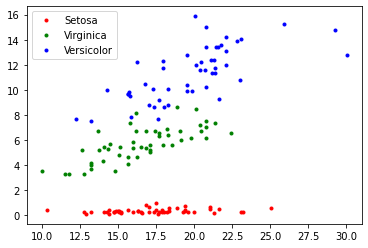

In [ ]:
plt.plot(X[:, 0][y == 0] * X[:, 1][y == 0], X[:, 2][y == 0] * X[:, 3][y == 0], 'r.', label="Setosa")
plt.plot(X[:, 0][y == 1] * X[:, 1][y == 1], X[:, 2][y == 1] * X[:, 3][y == 1], 'g.', label="Virginica")
plt.plot(X[:, 0][y == 2] * X[:, 1][y == 2], X[:, 2][y == 2] * X[:, 3][y == 2], 'b.', label="Versicolor")
plt.legend()
plt.show()

# **Visualisation Helper**

In [ ]:
dataset = load_iris()

In [ ]:
X = dataset.data
y = dataset.target

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [ ]:
import matplotlib.pyplot as plt
def viz_hypo(score_func, pred_func, X_samples, y_samples):
    """
    X_samples is to provide a range
    """
    # visualisation of the model behaviour
    x0_min, x1_min = np.min(X_samples, axis=0)
    x0_max, x1_max = np.max(X_samples, axis=0)

    xx, yy = np.meshgrid(np.arange(x0_min - 0.1, x0_max + 0.1, 0.02),
                        np.arange(x1_min - 0.1, x1_max + 0.1, 0.02))
    
    grid_coord = np.stack((xx.flatten(), yy.flatten())).T
    zz_c = pred_func(grid_coord).reshape(xx.shape)
    zz_v = score_func(grid_coord).reshape(xx.shape)

    fig1, ax1 = plt.subplots(constrained_layout=True)
    C = ax1.contourf(xx, yy, zz_v) 
    C2 = ax1.contour(xx, yy, zz_v, colors=('k', ), linewidths=2)
    ax1.clabel(C2, inline=True, fontsize=10)

    fig2, ax2 = plt.subplots(constrained_layout=True)
    C = ax2.contourf(xx, yy, zz_c) 
    C2 = ax2.contour(xx, yy, zz_c, colors=('k', ), linewidths=2)
    ax2.clabel(C2, inline=True, fontsize=10)

    # Draw the training samples
    ax1.scatter(X_samples[:, 0], X_samples[:, 1], c=y_samples, linewidth=1, edgecolor='k')
    ax2.scatter(X_samples[:, 0], X_samples[:, 1], c=y_samples, linewidth=1, edgecolor='k')
    plt.show()


In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")
fig.show()

# **Two-Class Averaged Perceptron**


The averaged perceptron method is an early and very simple version of a neural network. In this approach, inputs are classified into several possible outputs based on a linear function, and then combined with a set of weights that are derived from the feature vector—hence the name "perceptron.

Specify how you want the model to be trained, by setting the Create trainer mode option.
Here we expand our tiny linear model into a Perceptron below:

## Optimisation steps to fit the model parameters to the data. 

Search parameters from an infinite hypothesis family to 1000 iterations!

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.20,random_state=42)

1. Set the Parameter Range: If you are not sure of the best parameters, find the optimal parameters by specifying multiple values and using the Tune Model Hyperparameters module to find the optimal configuration. The trainer iterates over multiple combinations of the settings you provided and determines the combination of values that produces the best model.

In [ ]:
max_iter = 1000
class MyPerceptron:
    def __init__(self):
        """
        The constructor method of an object.
        """
        self.h = np.array([0, 1, 0], dtype=np.float)


    def compute_linear_score_with_(self, X, h):
        """
        Compute the linear function
        s[i] = <h, X[i]> + bias, <., .> represents inner product
        """
        s = None
        # insert your code here
        # HINT: the *last* element in an array is represented as a[-1]
        s = (X * h[:-1]).sum(axis=1) + h[-1]
        return s

    def predict_with_(self, X, h):
        # return 0/1 according to the linear score
        return np.sign(self.compute_linear_score_with_(X, h)).astype(np.int)

    def predict(self, X):
        return self.predict_with_(X, self.h)

    def fit(self, X, y):
        """
        :param X: training samples -- observed attribute values
        :param y: the known answer for each sample

        NOTE: now the "loss" has been encoded. You can try a customised one!
        """
       
        ii = 0
        while True:
            predicted = self.predict_with_(X, self.h)
           
            error_indexes = np.nonzero(predicted != y)[0]
            if len(error_indexes) > 0:
                i = error_indexes[np.random.randint(len(error_indexes))]
                self.h[:-1] += X[i] * float(y[i])
                
                self.h[-1] += float(y[i])
                
                print(f"{ii} Train errors: {len(error_indexes)}")
              
            else: 
                break 
            ii += 1
            if ii>=max_iter:
                break

In [ ]:
my_model = MyPerceptron() # initiate an object
my_model.fit(simple_X_train, simple_y_train)

0 Train errors: 35
1 Train errors: 35
2 Train errors: 35
3 Train errors: 35
4 Train errors: 35
5 Train errors: 35
6 Train errors: 35
7 Train errors: 35
8 Train errors: 35
9 Train errors: 35
10 Train errors: 35
11 Train errors: 35
12 Train errors: 35
13 Train errors: 35
14 Train errors: 35
15 Train errors: 35
16 Train errors: 35
17 Train errors: 35
18 Train errors: 35
19 Train errors: 35
20 Train errors: 35
21 Train errors: 35
22 Train errors: 35
23 Train errors: 35
24 Train errors: 35
25 Train errors: 35
26 Train errors: 35
27 Train errors: 35
28 Train errors: 35
29 Train errors: 35
30 Train errors: 35
31 Train errors: 35
32 Train errors: 35
33 Train errors: 35
34 Train errors: 35
35 Train errors: 35
36 Train errors: 35
37 Train errors: 35
38 Train errors: 35
39 Train errors: 35
40 Train errors: 35
41 Train errors: 35
42 Train errors: 35
43 Train errors: 35
44 Train errors: 35
45 Train errors: 35
46 Train errors: 35
47 Train errors: 35
48 Train errors: 35
49 Train errors: 35
50 Train e

In [ ]:
max_iter = 1000
class Perceptron:
    def __init__(self):
        self.h = np.array([0, 1, 0], dtype=np.float)


    def compute_linear_score_with_(self, X, h):
        s = None
        s = (X * h[:-1]).sum(axis=1) + h[-1]
        return s

    def predict_with_(self, X, h):

        return np.sign(self.compute_linear_score_with_(X, h)).astype(np.int)

    def predict(self, X):
        return self.predict_with_(X, self.h)

    def fit(self, X, y):
        """
        :param X: training samples -- observed attribute values
        :param y: the known answer for each sample

        NOTE: now the "loss" has been encoded. You can try a customised one!
        """
        # Follow the tutorial of perpectron training
        ii = 0
        while True:
            predicted = self.predict_with_(X, self.h)
            error_indexes = np.nonzero(predicted != y)[0]
            # `nonzero` returns the indexes for multiple dimension array,
            # Here only the indexes of the first (and only) dimension is 
            # concerned, therefore the [0]

            if len(error_indexes) > 0:
                i = error_indexes[np.random.randint(len(error_indexes))]
                self.h[:-1] += X[i] * float(y[i])
                # To update the weights
                self.h[-1] += float(y[i])
                # To update the b-bias
                #   This is equivalent to using the homogeneous representation
                #   of x, where the last element is one
                print(f"{ii} Train errors: {len(error_indexes)}")
               # ii += 1
            else: 
                break 
            ii += 1
            if ii>=max_iter:
                break

In [ ]:
import torch
import torch.nn as nn

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.l1 = nn.Linear(4, 16)
        self.l2 = nn.Linear(16, 1)

nn = MyNet()
a  = 0
for p in nn.parameters():
    a += p.numel()
print(a)

97


Take only 2 classes 0. Setosa, 1 = versicolor, 2 = virginica

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=123)

Make a constant 1 attribute = homogenous variable list

In [ ]:
ons_ = np.ones((X_train.shape[0],1))
X_train_homo = np.concatenate([X_train, ons_], axis = 1)
ons_ = np.ones((X_test.shape[0],1))
X_test_homo = np.concatenate([X_test, ons_], axis = 1)

In [ ]:
type(y_train), type(X_train_homo)

(numpy.ndarray, numpy.ndarray)

W is a 5-vector 
X is a n x 5 array, representing the data.
hval is a h-value, errors made on samples, h is always +/- by 1 detemined by a]]] 

In [ ]:
def perceptron_predict(W, X):
  hval = (W * X).sum(axis=1)
  pred = np.sign(hval)
  return pred

In [ ]:
W = np.array([0.1, -0.5, 3, -2, -10])
print(perceptron_predict(W, X_train_homo))

[-1.  1. -1. -1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1.
 -1. -1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.
 -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.
  1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.
 -1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.  1.  1.
 -1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1.]


To find out where the predictin is correct or not!

In [ ]:
class MyPerceptron:
  def __init__(self):
      self.W = np.array([0.1, -0.5, 3, -2])
      self.b = 1.0

In [ ]:
max_iterations = 1000
 
def perceptron_predict(W, X):
  hval = (W * X).sum(axis=1)
  pred = np.sign(hval)
  return pred
 
  W = np.array([0.1, -0.5, 3, -2, -10])
 
  while True:
      pred = perceptron_predict(W, X_train_homo)
      is_pred_corr = y_train == pred
      is_pred_wrong = np.logical_not(is_pred_corr)
      error_indexes = np.nonzero(is_pred_wrong)[0]
      accu_train = np.count_nonzero(is_pred_corr) / y_train.size
      print(f"Training Accuracy {accu_train}")
      
      pred_valid = perceptron_predict(W, X_test_homo)
      accu_valid = np.count_nonzero(pred_valid == y_test) / y_test.size
      print(f"Validation Accuracy {accu_valid}")
 
      if len(error_indexes) > 0:
            next_i = error_indexes[0]
            W_update = X_train_homo[next_i] * y_train[next_i]
            W += W_update
      else: 
           break 
      ii += 1
            
      if ii>=max_iter:
            break


 
pred = perceptron_predict (W, X_train_homo)
 
is_pred_corr = y_train.size
 
print(is_pred_corr)
print(np.nonzero(is_pred_corr))
np.count_nonzero(y_train == pred) /y_train.size

105
(array([0]),)


0.38095238095238093

In [ ]:
pred_valid = my_model.predict(simple_X_valid)
valid_corr_num = (pred_valid == simple_y_valid).sum()
print("Valid accu", valid_corr_num / len(simple_y_valid))

Valid accu 0.4


In [ ]:
pred = perceptron_predict(W, X_train_homo)
is_pred_corr = y_train == pred
is_pred_wrong = np.logical_not(is_pred_corr)
error_indexes = np.nonzero(is_pred_wrong)[0]
#find out where the prediction is INCORRECT
accu_train = np.count_nonzero(is_pred_corr) / y_train.size
print(f"Training Accuracy {accu_train}")
next_i = error_indexes[0]
W_update = X_train_homo[next_i] * y_train[next_i]
W += W_update

Training Accuracy 0.11428571428571428


In [ ]:
pred = perceptron_predict(W, X_train_homo)
is_pred_corr = y_train == pred
is_pred_wrong = np.logical_not(is_pred_corr)
error_indexes = np.nonzero(is_pred_wrong)[0]
#find out where the prediction is INCORRECT
accu_train = np.count_nonzero(is_pred_corr) / y_train.size
print(f"Training Accuracy {accu_train}")
next_i = error_indexes[0]
W_update = X_train_homo[next_i] * y_train[next_i]
W += W_update

Training Accuracy 0.38095238095238093


In [ ]:
a = np.array([[1,2,3], [4,5,6]])
b = np.array ([1,2,3])
print(b, b.shape)
print(a * b)

[1 2 3] (3,)
[[ 1  4  9]
 [ 4 10 18]]


In [ ]:
from sklearn.linear_model import Perceptron

skperceptron = Perceptron()

In [ ]:
skperceptron.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
skperceptron.predict(X_train)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
simple_X_train, simple_X_valid, simple_y_train, simple_y_valid = \
    train_test_split(simple_X, simple_y)